# 1. 토큰화 

### 표준 토큰화(Treebank Tokenization)

In [1]:
from nltk.tokenize import TreebankWordTokenizer

In [3]:
tokenizer = TreebankWordTokenizer()
text = "Model-based RL don't need ad value function fro the policy"
print(tokenizer.tokenize(text))

['Model-based', 'RL', 'do', "n't", 'need', 'ad', 'value', 'function', 'fro', 'the', 'policy']


### 토큰화 라이브러리 
#### 단어의 형태소 level에서 분석을 하게 되면  다른 동사 또는 다른 시제의 단어라고 해도 같은 형태로 토큰화를 할 수 있습니다. 두 가지 대표적인 어간 추출 패키지를 알아보자

In [5]:
from nltk.tokenize import word_tokenize
print(word_tokenize(text))

['Model-based', 'RL', 'do', "n't", 'need', 'ad', 'value', 'function', 'fro', 'the', 'policy']


### 정수 인코딩 및 sorting
#### 1. Enumerate 사용 복습

In [6]:
mylist = ['English','Math','Science']
for n, name in enumerate(mylist):
    print("Course : {}, Number : {}".format(name,n))

Course : English, Number : 0
Course : Math, Number : 1
Course : Science, Number : 2


#### 2. 정수 인코딩 및 High-frequency Sorting

In [9]:
vocab = {'apple' : 2, "July":6,'piano':4,'cup':8,'orange':1}
vocab_sort = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sort)
word2inx = {word[0] : index + 1 for index, word in enumerate(vocab_sort)}
print(word2inx)

[('cup', 8), ('July', 6), ('piano', 4), ('apple', 2), ('orange', 1)]
{'cup': 1, 'July': 2, 'piano': 3, 'apple': 4, 'orange': 5}


In [28]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = "Model-based RL don't need ad value function for the policy" \
        " but some of Model-based RL algorithms do have a value function."
token_text = tokenizer.tokenize(text)
word2inx = {}
Bow = []
for word in token_text:
    if word not in word2inx.keys():
        word2inx[word] = len(word2inx)
        Bow.insert(len(word2inx) -1,1)
    else :
        inx = word2inx.get(word)
        Bow[inx] += 1
print("단어수 :",word2inx)
print("단어 빈도수 :",Bow)

단어수 : {'Model-based': 0, 'RL': 1, 'do': 2, "n't": 3, 'need': 4, 'ad': 5, 'value': 6, 'function': 7, 'for': 8, 'the': 9, 'policy': 10, 'but': 11, 'some': 12, 'of': 13, 'algorithms': 14, 'have': 15, 'a': 16, '.': 17}
단어 빈도수 : [2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
token_text

['Model-based',
 'RL',
 'do',
 "n't",
 'need',
 'ad',
 'value',
 'function',
 'for',
 'the',
 'policy',
 'but',
 'some',
 'of',
 'Model-based',
 'RL',
 'algorithms',
 'do',
 'have',
 'a',
 'value',
 'function',
 '.']

### 유사도 분석
#### 1. 코사인 유사도 분석

In [30]:
import numpy as np

In [33]:
def cos_sim(A,B):
    return np.dot(A,B) / (np.linalg.norm(A) * np.linalg.norm(B))

a = [1,0,0,1]
b = [0,1,1,0]
c = [1,1,1,1]
print(cos_sim(a,b), cos_sim(b,c), cos_sim(c,a))

0.0 0.7071067811865475 0.7071067811865475


#### 2. 레반슈타인 거리

In [40]:
def leven(text1, text2):
    len1 = len(text1) +1
    len2 = len(text2) +1
    sim_array = np.zeros((len1, len2))
    sim_array[:,0] = np.linspace(0, len1-1, len1) 
    sim_array[0,:] = np.linspace(0, len2-1, len2)
    for i in range(1, len1):
        for j in range(1, len2):
            add_char  =sim_array[i-1,j] + 1
            sub_char = sim_array[i,j-1] + 1
            if text1[i-1] == text2[j-1]:
                mod_char = sim_array[i-1,j-1]
            else :
                mod_char = sim_array[i-1, j-1] + 1
            sim_array[i,j] = min([add_char, sub_char, mod_char])
    return sim_array[-1,-1]
print(leven('데이터마이닝','데이타마닝'))

2.0


### Word2Vec - CBoW, SkipGram
#### CBoW와 SkipGram을 위한 전처리 복습 및 Overview

In [49]:
#1. Training Samples
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
data = pd.read_csv('C:/Users/admin/STUDY/NLP학습/실습자료_NLP/transcripts.csv')
print('Missing Values: ', data.isnull().sum())
data = data.dropna().reset_index(drop=True)
merge_data = ''.join(str(data.iloc[i,0]) for i in range(100))
print('Total word count: ', len(merge_data))
print(merge_data[:40])

Missing Values:  transcript    0
url           0
dtype: int64
Total word count:  1511817
Good morning. How are you?(Laughter)It's


In [52]:
tokenizer = RegexpTokenizer("[\w]+")
token_text = tokenizer.tokenize(merge_data)


stop_words = set(stopwords.words('english'))
token_stop_text = []
for w in token_text:
    if w not in stop_words:
        token_stop_text.append(w)
print('After cleaning :', len(token_stop_text))
print(token_stop_text[:10])

After cleaning : 147300
['Good', 'morning', 'How', 'Laughter', 'It', 'great', 'I', 'blown', 'away', 'whole']


In [47]:
word2inx = {}
Bow = []
for word in token_stop_text:
    if word not in word2inx.keys():
        word2inx[word] = len(word2inx)
        Bow.insert(len(word2inx)-1,1)
    else:
        inx = word2inx.get(word)
        Bow[inx] += 1
print('Unique Words Count :', len(Bow))

Unique Words Count : 16689


#### nltk 내장 함수를 이용한 CBoW 학습

In [54]:
#2. Word2Vec Training
import numpy as np
token_stop_text = np.reshape(np.array(token_stop_text),[-1,1])
from gensim.models import Word2Vec
model = Word2Vec(vector_size = 100, window = 5, min_count = 2, sg = 0)
model.build_vocab(token_stop_text)
model.train(token_stop_text, total_examples = model.corpus_count, epochs = 30, report_delay = 1)
vocabs = model.wv.key_to_index.keys()
word_vec_list = [model.wv[i] for i in vocabs]

C:\Users\admin\Anaconda3\envs\nlp\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### PCA를 통한 학습 모델 시각화

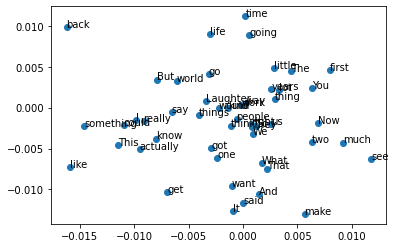

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2차원으로 축소
pcafit = pca.fit_transform(word_vec_list)
x = pcafit[0:50,0]
y = pcafit[0:50,1]
import matplotlib.pyplot as plt
plt.scatter(x, y, marker = 'o')
for i, v in enumerate(vocabs):
    if i <= 49:
        plt.annotate(v, xy = (x[i], y[i]))
plt.show()
# sg : kip-gram
# # vector_size : embedded vector size0 is CBOW, 1 is S
# window : context window size
# min_count : do not apply word2vec to sparse words

### SGNS : SkipGram with Negative Sampling
#### SkipGram 전용 Dataset 구성

In [60]:
#SGNS
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import numpy as np
data = pd.read_csv('./실습자료_NLP/transcripts.csv')
print('Missing Values: ', data.isnull().sum())
data = data.dropna().reset_index(drop=True)
merge_data = ''.join(str(data.iloc[i,0]) for i in range(30))
print('Total word count: ', len(merge_data))

Missing Values:  transcript    0
url           0
dtype: int64
Total word count:  507413


In [61]:
tokenizer = RegexpTokenizer("[\w]+")
token_text = tokenizer.tokenize(merge_data)

stop_words = set(stopwords.words('english'))
token_stop_text = []
for w in token_text:
    if w not in stop_words:
        token_stop_text.append(w)
print('After cleaning :', len(token_stop_text))


After cleaning : 50038


In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token_stop_text)
word2idx = toke
nizer.word_index
encoded = tokenizer.texts_to_sequences(token_stop_text)
encoded = np.array(encoded).T
from tensorflow.keras.preprocessing.sequence import skipgrams
skip_gram = [skipgrams(sample, vocabulary_size = len(word2idx)+1,
                       window_size = 10) for sample in encoded]

In [65]:
import torch
import torch.nn as nn
from torch import LongTensor as LT
from torch import FloatTensor as FT

C:\Users\admin\Anaconda3\envs\nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Word2Vec의 원리는 각 단어마다 지정된 고유 벡터 값을 생성하는 것.
#### Word2Vec class에서 그 툴을 생성

In [66]:
class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(Word2Vec, self).__init__()
        self.vocab_size = vocab_size
        self.embed_size = embed_size
        self.word1_vector = nn.Embedding(self.vocab_size, self.embed_size)
        self.word2_vector = nn.Embedding(self.vocab_size, self.embed_size)
        self.word1_vector.weight = \
            nn.Parameter(torch.cat([torch.zeros(1, self.embed_size), FT(self.vocab_size-1,
                                                                       self.embed_size).uniform_(-0.1, 0.1)]))
        self.word2_vector.weight = \
            nn.Parameter(torch.cat([torch.zeros(1, self.embed_size), FT(self.vocab_size - 1,
                                                                       self.embed_size).uniform_(-0.1, 0.1)]))
        self.word1_vector.weight.requires_grad = True
        self.word2_vector.weight.requires_grad = True

    def forward_word1(self, data):
        vec = LT(data)
        vec = vec.cuda() if self.word1_vector.weight.is_cuda else vec
        return self.word1_vector(vec)


    def forward_word2(self, data):
        vec = LT(data)
        vec = vec.cuda() if self.word2_vector.weight.is_cuda else vec
        return self.word2_vector(vec)

#### torch.bmm
#### - [B, n, m] x [B, m, p] = [B, n, p]

In [68]:
class SGNS(nn.Module):
    def __init__(self, embed, vocab_size):
        super(SGNS, self).__init__()
        self.embed = embed
        self.vocab_size = vocab_size
        self.weights = None
    def forward(self, word1, word2, label):
        word1 = self.embed.forward_word1(word1).unsqueeze(1)
        word2 = self.embed.forward_word2(word2).unsqueeze(2)
        label = LT(label).unsqueeze(1)
        prediction = torch.bmm(word1, word2).squeeze(2).sigmoid().log()
        loss = -label * prediction
        return loss.mean()

In [69]:
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
vocab_size = len(word2idx)+1
word2vec = Word2Vec(vocab_size = vocab_size, embed_size = 100)
sgns = SGNS(embed = word2vec, vocab_size = vocab_size)
optim = Adam(sgns.parameters())
print('Train Ready')

Train Ready


In [70]:
for _, element in enumerate(skip_gram):
    word1 = LT(np.array(list(zip(*element[0]))[0], dtype = 'int32'))
    word2 = LT(np.array(list(zip(*element[0]))[1], dtype = 'int32'))
    label = LT(np.array(element[1], dtype = 'int32'))
    dataset = TensorDataset(word1, word2, label)
    train_loader = DataLoader(dataset, batch_size = 256, shuffle = True)
print('Data Loaded')

Data Loaded


In [71]:
for epoch in range(5):
    with tqdm(train_loader, unit = 'batch') as tepoch:
        for word1, word2, label in tepoch:
            loss = sgns(word1, word2, label)
            optim.zero_grad()
            loss.backward()
            optim.step()
            tepoch.set_description(f"Epoch {epoch}")
            tepoch.set_postfix(loss = loss.item())

Epoch 4: 100%|████████████████████████████████████████████████████| 7818/7818 [03:22<00:00, 38.63batch/s, loss=9.34e-8]


In [72]:
f = open('vectors.txt' ,'w')
ww = 0
f.write('{} {}\n'.format(7930, 100))
vectors = word2vec.word1_vector.weight.detach().numpy()
for i, v in enumerate(word2idx.keys()):
    try:
        f.write('{} {}\n'.format(v, ' '.join(map(str, list(vectors[i+1, :])))))
        ww += 1
    except:
        print('Non-English Characters')
f.close()
import gensim
embed_word2vec = gensim.models.KeyedVectors.load_word2vec_format('vectors.txt', binary = False)

embed_word2vec.most_similar(positive = ['country'])

Non-English Characters
Non-English Characters
Non-English Characters
Non-English Characters
Non-English Characters
Non-English Characters


[('made', 0.9871626496315002),
 ('new', 0.9865283966064453),
 ('they', 0.9858470559120178),
 ('know', 0.9855052828788757),
 ('somebody', 0.9854188561439514),
 ('united', 0.9853945970535278),
 ('kind', 0.9846754670143127),
 ('become', 0.9844489097595215),
 ('love', 0.9844077825546265),
 ('one', 0.984302818775177)]

In [73]:
embed_word2vec.most_similar(positive = ['love'])

[('next', 0.9867959022521973),
 ('many', 0.9864321351051331),
 ('believe', 0.9863847494125366),
 ('new', 0.9860018491744995),
 ('use', 0.9859516620635986),
 ('they', 0.9858907461166382),
 ('design', 0.985862135887146),
 ('that', 0.9857882261276245),
 ('want', 0.9857333898544312),
 ('back', 0.9855797290802002)]